<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/CarPriceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
 drivepath = '/content/drive/My Drive/'

In [157]:
carPrices = pd.read_csv(drivepath+"CarPrice_Assignment.csv")
carPrices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [158]:
carPrices.shape

(205, 26)

In [159]:
carPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [160]:
carPrices.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

**Prepare Car CompanyName**


In [162]:

carPrices['CarName'] = carPrices['CarName'].apply(lambda x: x.split( )[0])
carPrices['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [163]:
Manufacturers= carPrices['CarName'].unique()
print (len (Manufacturers))
print (Manufacturers)

28
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


**Note: some of the company names seem repeated with wrong spellings or case mutations  . data cleaning has to be done.**

In [0]:
carPrices['CarName'] = carPrices['CarName'].str.lower()
carPrices['CarName'].replace({'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'vokswagen'},  inplace=True)
# There is spelling mistake in name of "Alfa-Romero" , The real world manufacturer is "Alfa-Romeo"
carPrices['CarName'].replace({'alfa-romero':'alfa-romeo'},  inplace=True)

**The Company Name Data is clean now**

In [165]:
Manufacturers= carPrices['CarName'].unique()
print (len (Manufacturers))
print (Manufacturers)

23
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'vokswagen'
 'volvo']


In [166]:
%pip install simple_colors
from simple_colors import *

def columnAnalysis(column, catList, threshold):
    Threshold =threshold
    uniqueVal = column.unique()
    numUniqueVal = len (uniqueVal)
    printUnique = uniqueVal if numUniqueVal < Threshold else ""
    printString = str(column.name) + " UniqueVal : " + str(numUniqueVal) 
    if (numUniqueVal <= Threshold and numUniqueVal>1):
        print(red(printString, 'bold'), end ="   ")
        print(printUnique)
        catList.append(column.name)
    else :
        print(printString)

    return catList

In [167]:
catgoricalVariables = []
for column in carPrices:
   catgoricalVariables = columnAnalysis(carPrices[column],catgoricalVariables, 25)
print (catgoricalVariables)

car_ID UniqueVal : 205
symboling UniqueVal : 6   [ 3  1  2  0 -1 -2]
CarName UniqueVal : 23   ['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'vokswagen'
 'volvo']
fueltype UniqueVal : 2   ['gas' 'diesel']
aspiration UniqueVal : 2   ['std' 'turbo']
doornumber UniqueVal : 2   ['two' 'four']
carbody UniqueVal : 5   ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel UniqueVal : 3   ['rwd' 'fwd' '4wd']
enginelocation UniqueVal : 2   ['front' 'rear']
wheelbase UniqueVal : 53
carlength UniqueVal : 75
carwidth UniqueVal : 44
carheight UniqueVal : 49
curbweight UniqueVal : 171
enginetype UniqueVal : 7   ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber UniqueVal : 7   ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
enginesize UniqueVal : 44
fuelsystem UniqueVal : 8   ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'i

In [168]:
#check if any column has null values
carPrices.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Note : All Columns have all the values filled. There are no missing values.**

In [169]:
carPrices.groupby('CarName').size()

CarName
alfa-romeo     3
audi           7
bmw            8
buick          8
chevrolet      3
dodge          9
honda         13
isuzu          4
jaguar         3
mazda         17
mercury        1
mitsubishi    13
nissan        18
peugeot       11
plymouth       7
porsche        5
renault        2
saab           6
subaru        12
toyota        32
vokswagen      2
volkswagen    10
volvo         11
dtype: int64

**Check the distributions per Category**


In [0]:
def plotCategoricalVariables(columnName,dataFrame):
    sns.set(style="whitegrid")
    ax = (carPrices.groupby(columnName).size()/len(carPrices.index)).plot.bar(color=sns.color_palette('dark', 15))
    ax.set(xlabel= columnName, ylabel='Model Count')
    plt.show()

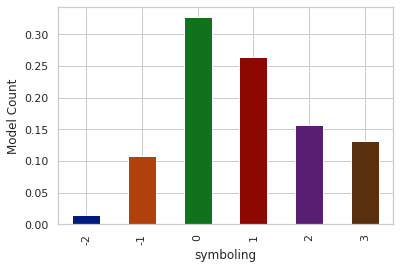

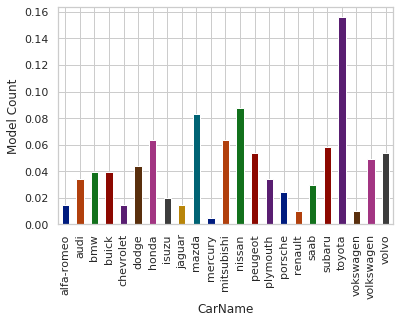

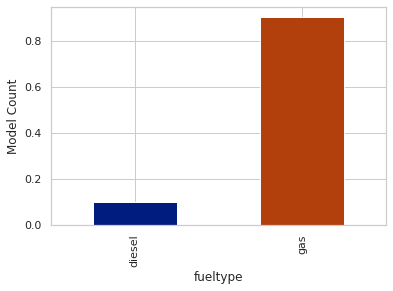

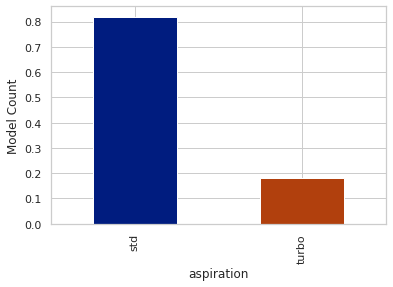

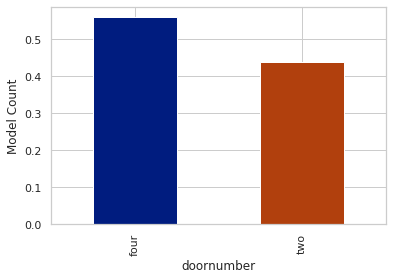

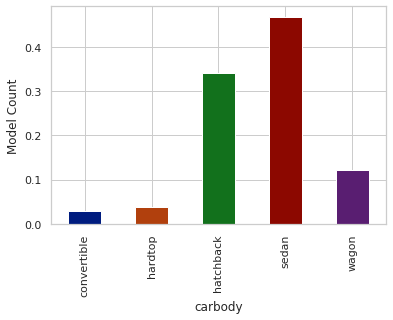

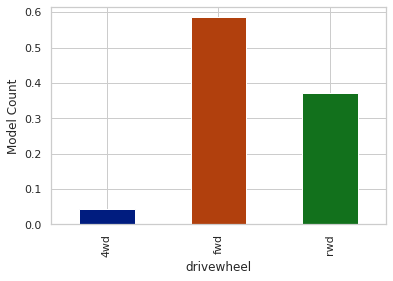

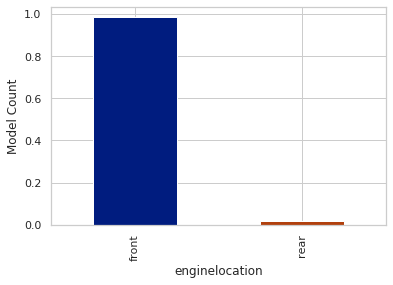

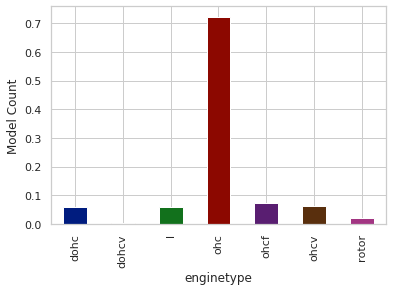

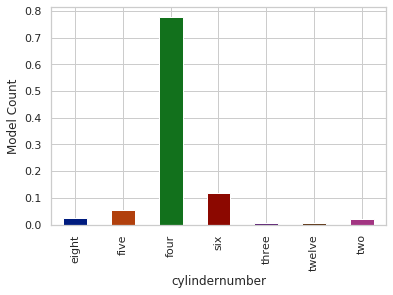

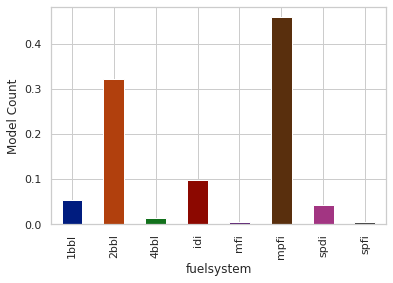

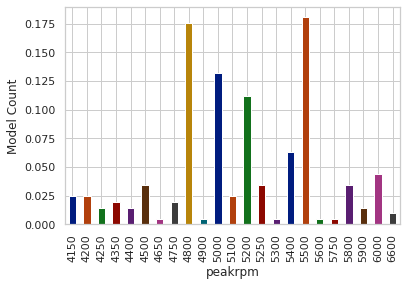

In [171]:
for column in catgoricalVariables:
    plotCategoricalVariables(column,carPrices)

In [0]:
def plotBox(columnName, dataFrame):
    plt.figure(figsize=(15,7))
    ax = sns.boxplot(x=dataFrame[columnName], y=dataFrame['price'], data=dataFrame, palette=sns.color_palette('dark', 15))
    ax.set(xlabel= columnName , ylabel='Price')
    plt.show()

**Insights :**

**1.** Toyota has most models

**2.** 85% models  run on Gas (Petrol)

**3.** Most models are sedan.

**4.** Most Models have Engine of 4 cylinders with OHC, mpfi in front. 


**CHECK HOW THE CATEGORICAL VARIABLES AFFECT PRICING**

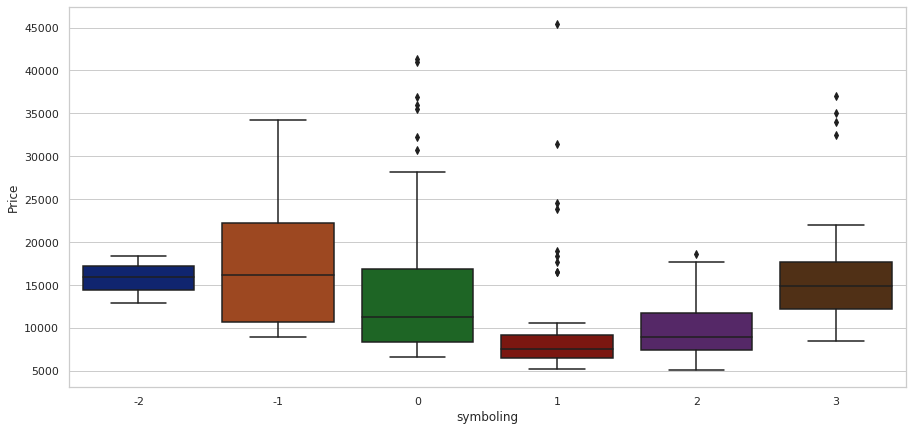

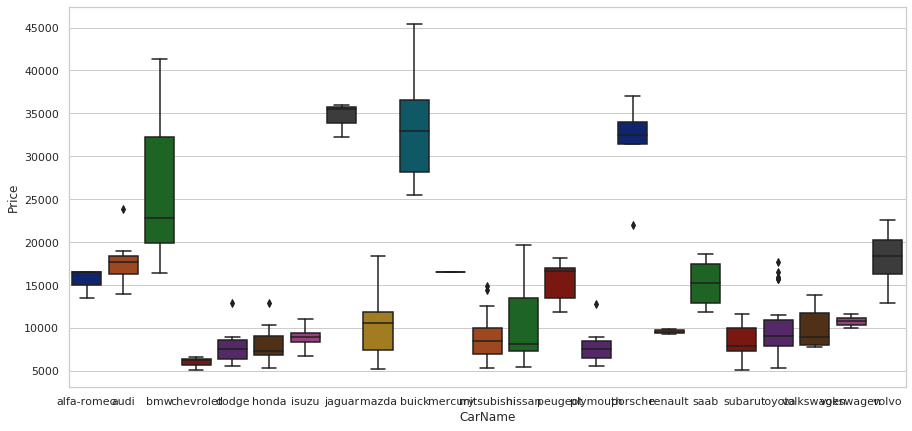

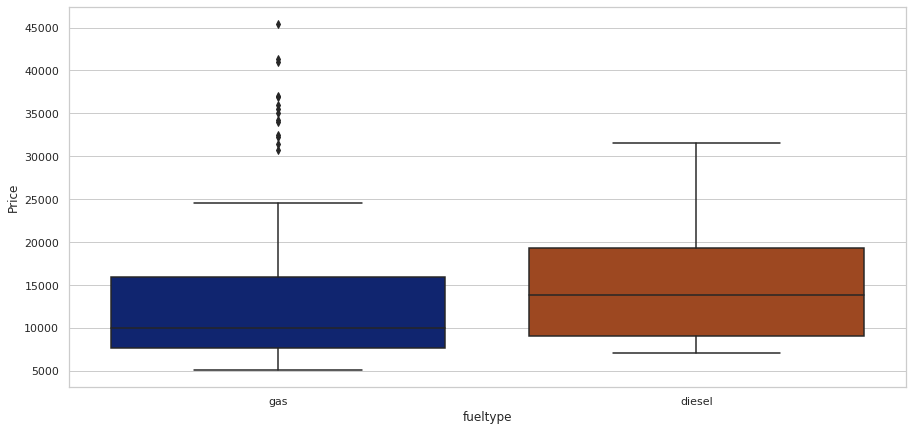

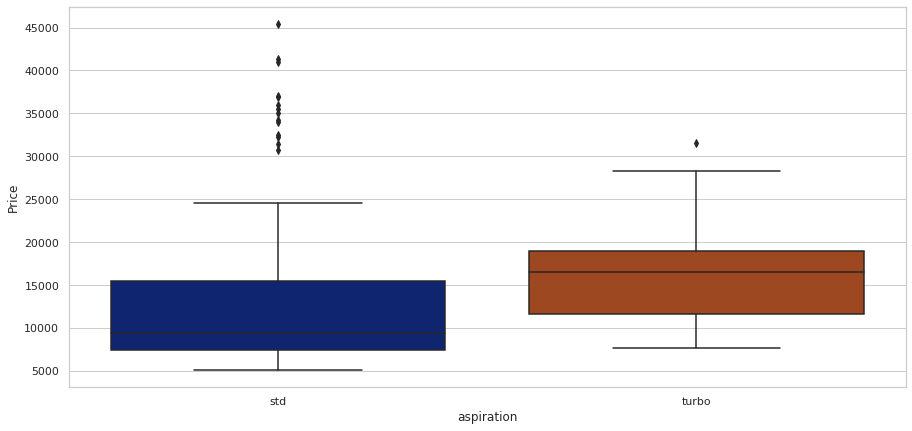

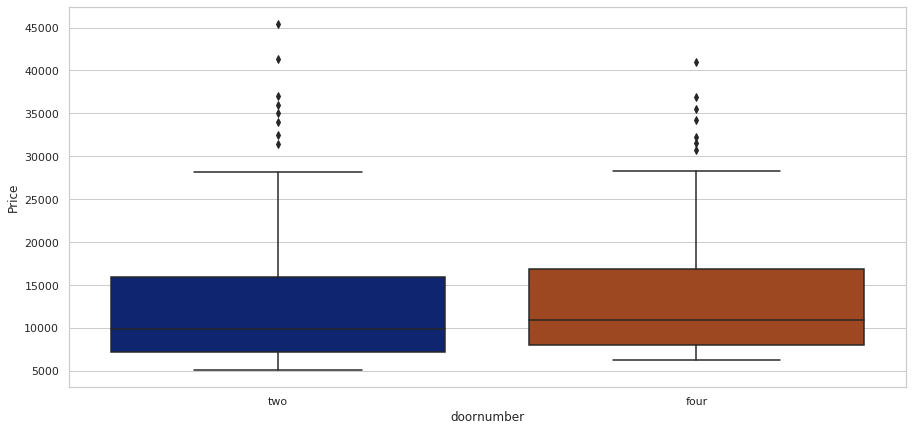

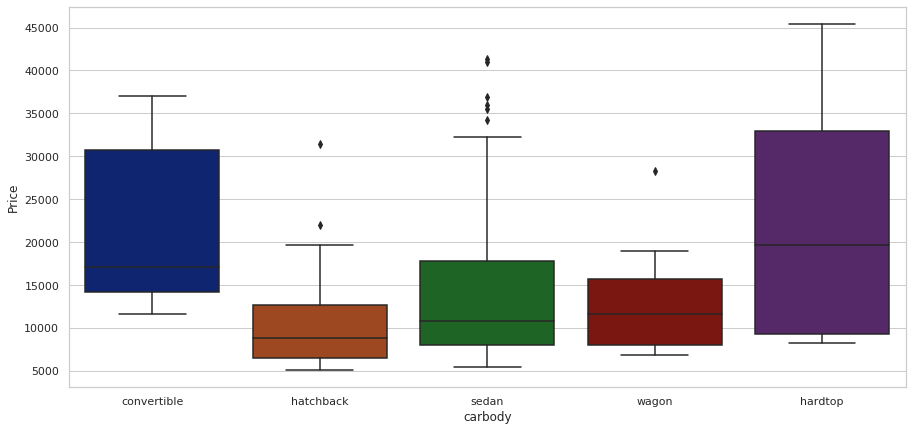

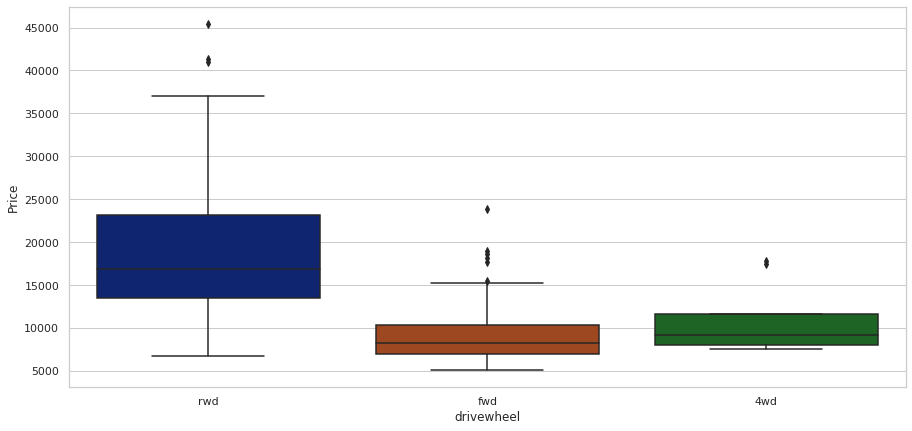

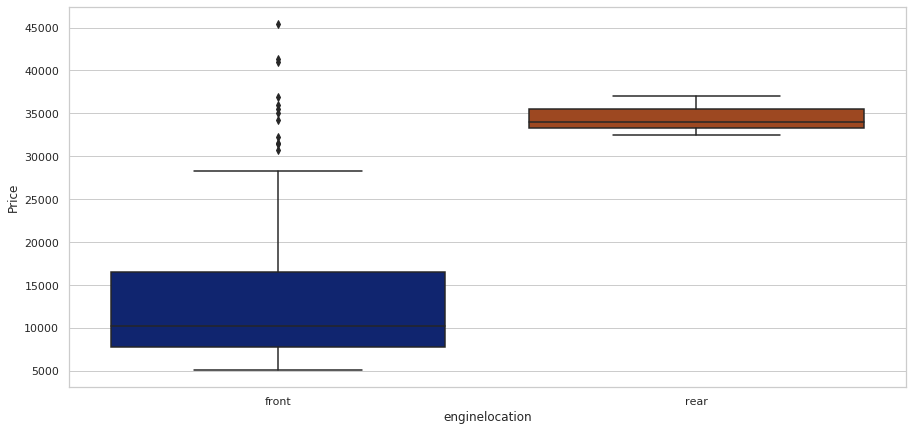

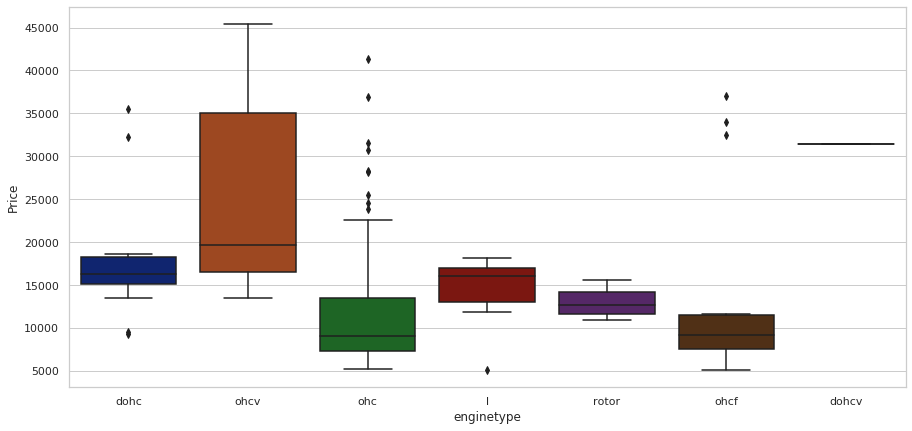

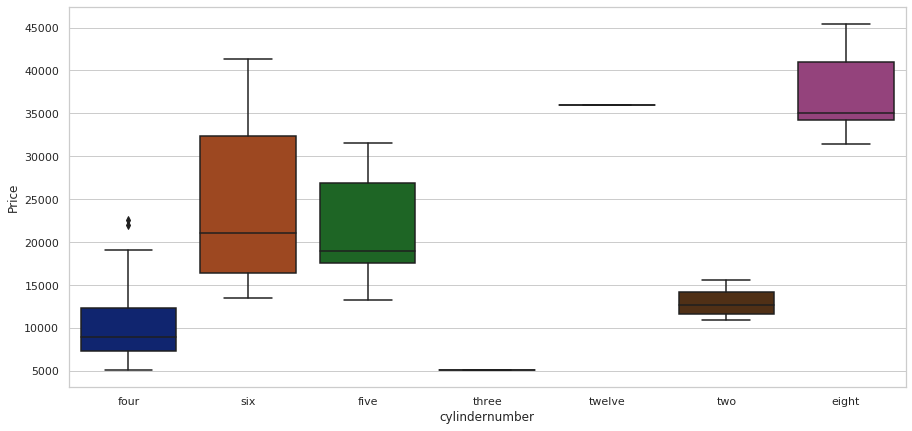

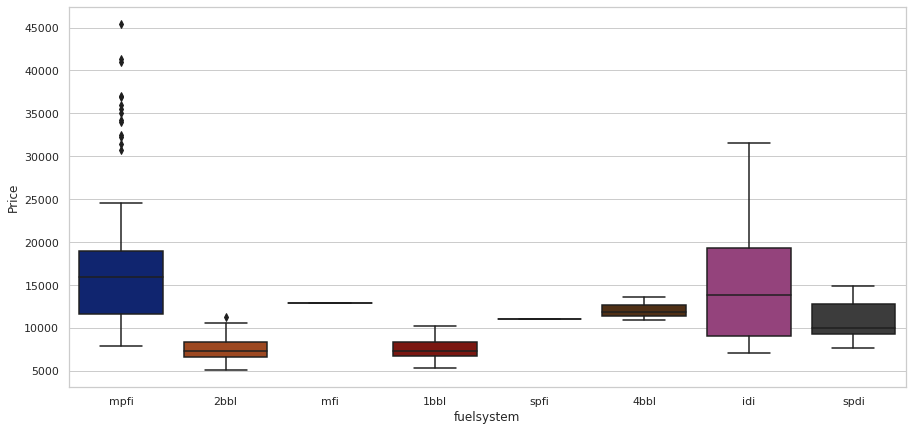

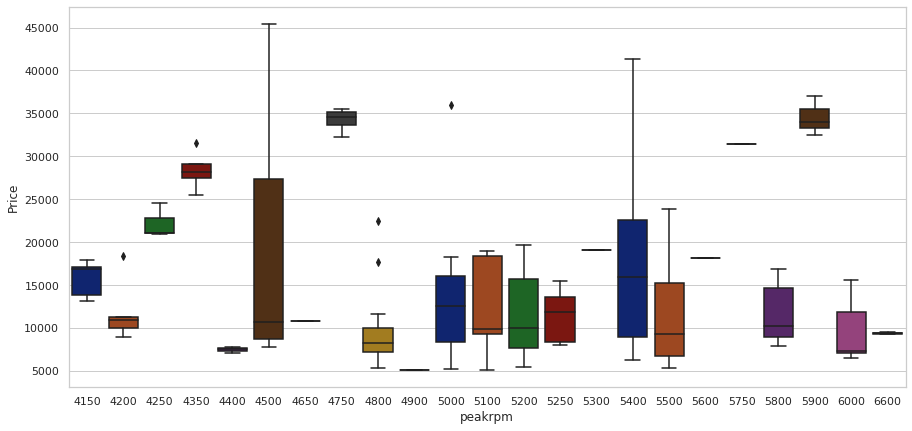

In [173]:

for column in catgoricalVariables:
    plotBox(column, carPrices)

**CHECK THE DISTRIBUTION OF PRICING IN GENERAL**

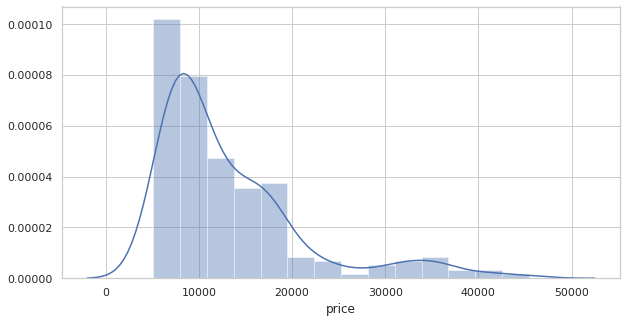

In [174]:

plt.figure(figsize=(10,5))
sns.distplot(carPrices['price'])
plt.show()


In [175]:
carPrices.groupby('CarName').price.mean().sort_values(ascending=False)

CarName
jaguar        34600.000000
buick         33647.000000
porsche       31400.500000
bmw           26118.750000
volvo         18063.181818
audi          17859.166714
mercury       16503.000000
alfa-romeo    15498.333333
peugeot       15489.090909
saab          15223.333333
vokswagen     10787.500000
mazda         10652.882353
nissan        10415.666667
volkswagen     9935.500000
toyota         9885.812500
renault        9595.000000
mitsubishi     9239.769231
isuzu          8916.500000
subaru         8541.250000
honda          8184.692308
plymouth       7963.428571
dodge          7875.444444
chevrolet      6007.000000
Name: price, dtype: float64

**divide car manufacturers in 4 groups**

1. <10K : Economy
2. 10K-20K : Premium
3. 20K -30K : Luxury
4. 30K> : SuperLuxury

In [0]:


carPrices['mean'] = carPrices.groupby('CarName')['price'].transform('mean')

In [177]:
carPrices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.333333
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.333333
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.166714
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.166714


In [0]:
def assignSegment(price):
    if((price < 10000)):
      return "economy"
    if((price >=10000) & (price <20000)):
      return "premium"
    if((price >=20000) & (price <30000)):
      return "luxury"
    if(price >=30000):
      return "super-luxury"   

In [0]:
carPrices['segment'] = carPrices['mean'].apply(assignSegment)

**Check Price Distribution as per segment**
(Although we already have some information on trend as Variable "Segment" is created by us)

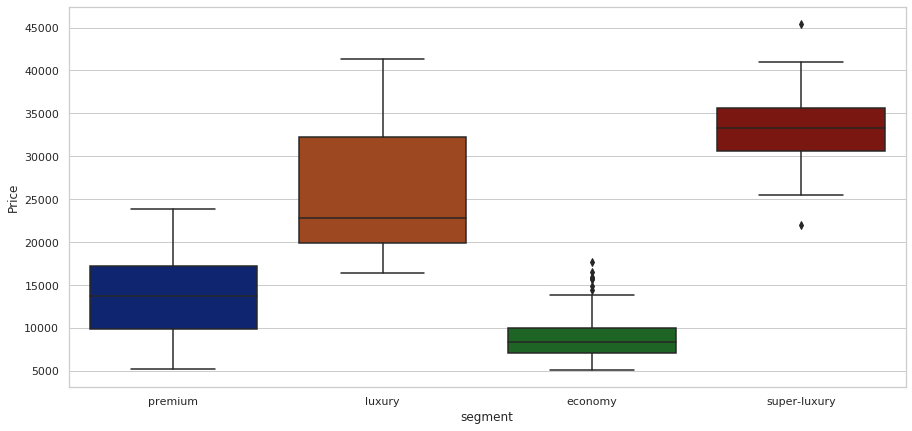

In [180]:
plotBox('segment', carPrices)

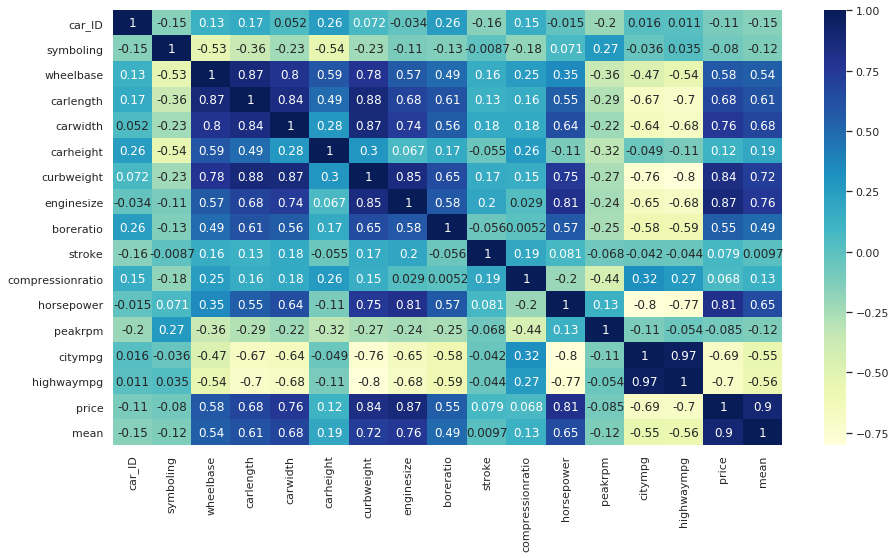

In [181]:
plt.figure(figsize=(15,8))
sns.heatmap(carPrices.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Some Collinierity is observed between variables e.g.  citympg-highwaympg,  carlength-curbweight etc. We will deal with it one by one**

<Figure size 216x144 with 0 Axes>

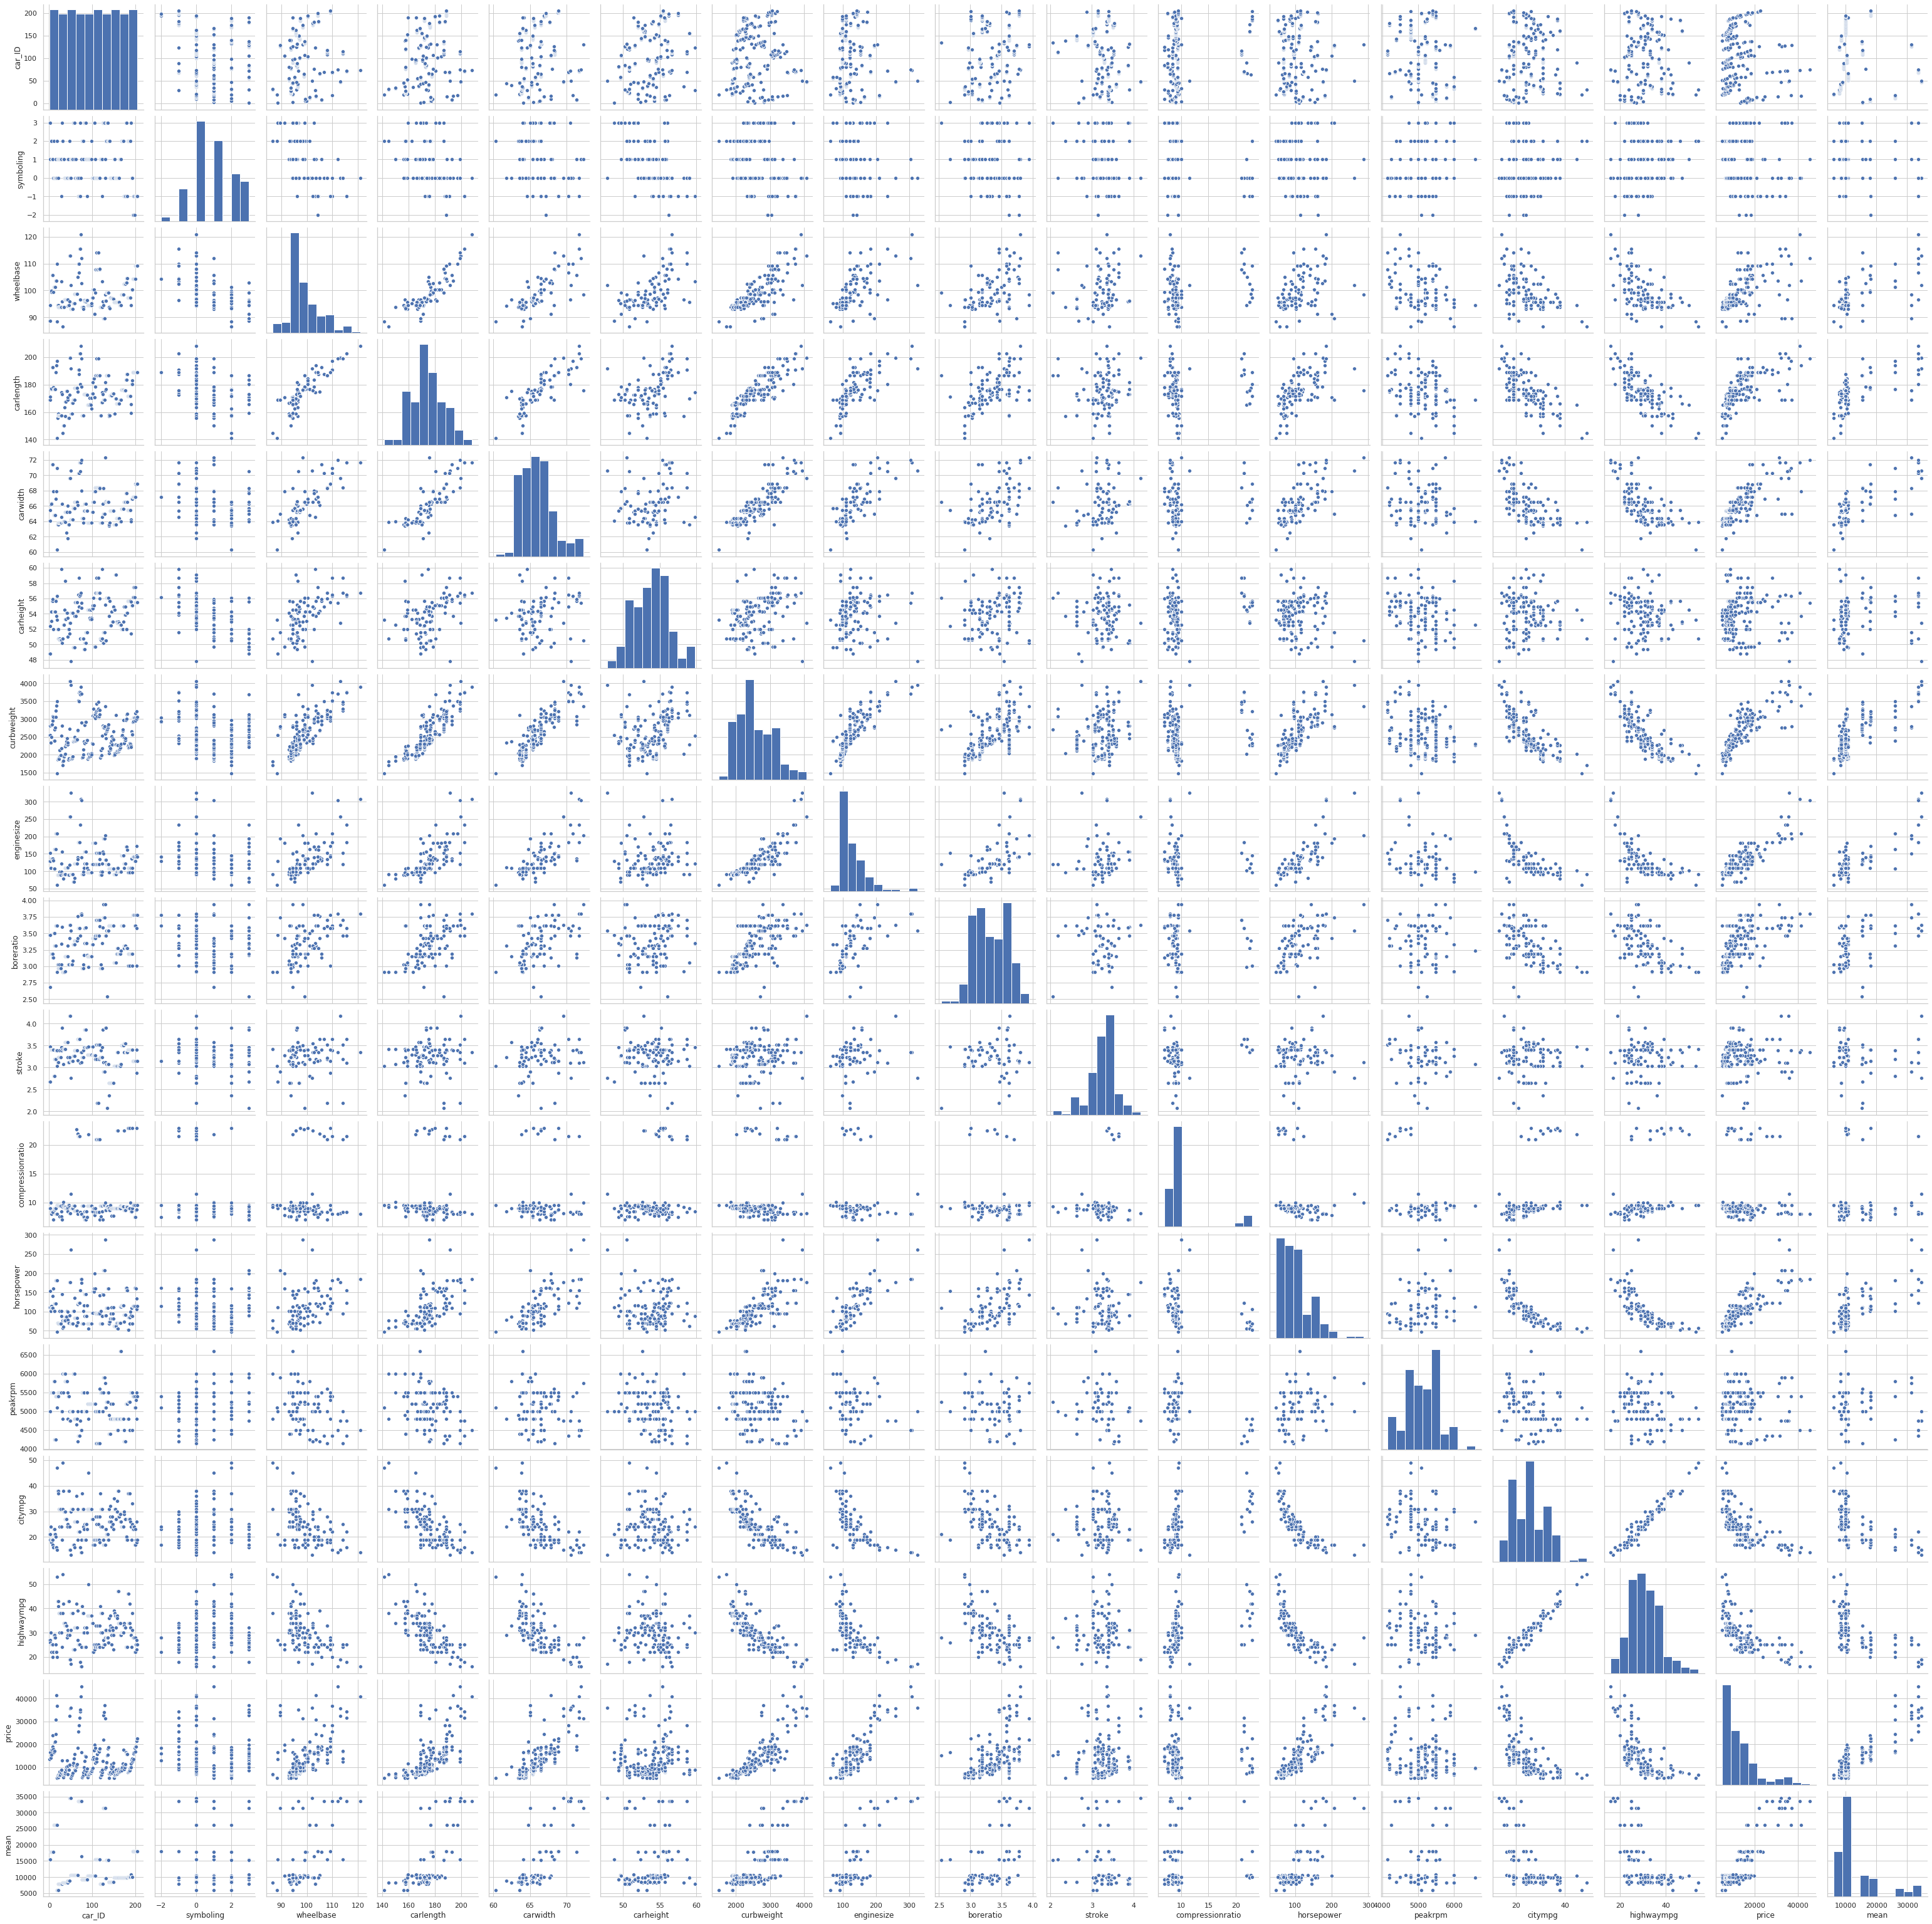

In [185]:
#check PairPlot too
plt.figure(figsize=(3,2))
sns.pairplot(carPrices)
plt.show()

In [186]:
BinaryVariables = []
for column in carPrices:
   BinaryVariables = columnAnalysis(carPrices[column],BinaryVariables, 2)
print (BinaryVariables)

car_ID UniqueVal : 205
symboling UniqueVal : 6
CarName UniqueVal : 23
fueltype UniqueVal : 2   
aspiration UniqueVal : 2   
doornumber UniqueVal : 2   
carbody UniqueVal : 5
drivewheel UniqueVal : 3
enginelocation UniqueVal : 2   
wheelbase UniqueVal : 53
carlength UniqueVal : 75
carwidth UniqueVal : 44
carheight UniqueVal : 49
curbweight UniqueVal : 171
enginetype UniqueVal : 7
cylindernumber UniqueVal : 7
enginesize UniqueVal : 44
fuelsystem UniqueVal : 8
boreratio UniqueVal : 38
stroke UniqueVal : 37
compressionratio UniqueVal : 32
horsepower UniqueVal : 59
peakrpm UniqueVal : 23
citympg UniqueVal : 29
highwaympg UniqueVal : 30
price UniqueVal : 189
mean UniqueVal : 23
segment UniqueVal : 4
['fueltype', 'aspiration', 'doornumber', 'enginelocation']


In [187]:
for column in BinaryVariables:
    print(carPrices[column].unique())



['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['front' 'rear']


Com

In [0]:
carPrices['fueltype'] = carPrices['fueltype'].map({'gas': 0, 'diesel': 1})
carPrices['aspiration'] = carPrices['aspiration'].map({'std': 0, 'turbo': 1})
carPrices['doornumber'] = carPrices['doornumber'].map({'two': 0, 'four': 1})
carPrices['enginelocation'] = carPrices['enginelocation'].map({'front': 0, 'rear': 1})

In [189]:
catgoricalVariables.append('segment')
print (catgoricalVariables)

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'peakrpm', 'segment']


In [0]:
#Drop UnNecessary Variables
carPrices.drop(['CarName', 'car_ID', 'mean'], axis=1, inplace=True)


**For removing influence of outliers , we will take 0.1-0.9 range for numeric variables**

In [0]:
#Convert Categorical Variables to dummy
AnalysisReadyCarPrices = pd.get_dummies(carPrices)

**Ready For Analysis**

In [204]:
AnalysisReadyCarPrices.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,segment_economy,segment_luxury,segment_premium,segment_super-luxury
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


**Fitting Linear Regression**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(AnalysisReadyCarPrices, train_size = 0.7, test_size = 0.3, random_state = 1)

**Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
MMScaler = MinMaxScaler()

In [208]:
NumericVars = list(carPrices.columns[carPrices.dtypes != 'object'])
print(NumericVars)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [209]:
scalingList = [x for x in NumericVars if x not in BinaryVariables]
print(scalingList)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [210]:
#select From scalingList
scalingList = ['wheelbase','carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

train[scalingList] = MMScaler.fit_transform(train[scalingList])

train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,segment_economy,segment_luxury,segment_premium,segment_super-luxury
124,3,0,1,0,0,0.320690,0.493103,0.428571,0.200000,0.469613,0.335938,0.750000,0.852381,0.0000,0.383621,0.346939,0.166667,0.210526,0.188260,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
181,-1,0,0,1,0,0.617241,0.744828,0.447619,0.525000,0.611135,0.355469,0.521429,0.609524,0.1375,0.431034,0.428571,0.166667,0.210526,0.262530,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
154,0,0,0,1,0,0.313793,0.432759,0.171429,0.941667,0.245219,0.085938,0.364286,0.457143,0.1250,0.025862,0.265306,0.388889,0.421053,0.067230,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
53,1,0,0,1,0,0.224138,0.382759,0.228571,0.525000,0.098598,0.082031,0.350000,0.514286,0.1250,0.051724,0.346939,0.500000,0.578947,0.037309,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
94,1,0,0,0,0,0.272414,0.356897,0.190476,0.558333,0.101147,0.105469,0.435714,0.580952,0.1500,0.056034,0.428571,0.500000,0.552632,0.052332,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
Y_train = train.pop('price')
X_train = train

In [212]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,segment_economy,segment_luxury,segment_premium,segment_super-luxury
124,3,0,1,0,0,0.320690,0.493103,0.428571,0.200000,0.469613,0.335938,0.750000,0.852381,0.0000,0.383621,0.346939,0.166667,0.210526,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
181,-1,0,0,1,0,0.617241,0.744828,0.447619,0.525000,0.611135,0.355469,0.521429,0.609524,0.1375,0.431034,0.428571,0.166667,0.210526,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
154,0,0,0,1,0,0.313793,0.432759,0.171429,0.941667,0.245219,0.085938,0.364286,0.457143,0.1250,0.025862,0.265306,0.388889,0.421053,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
53,1,0,0,1,0,0.224138,0.382759,0.228571,0.525000,0.098598,0.082031,0.350000,0.514286,0.1250,0.051724,0.346939,0.500000,0.578947,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
94,1,0,0,0,0,0.272414,0.356897,0.190476,0.558333,0.101147,0.105469,0.435714,0.580952,0.1500,0.056034,0.428571,0.500000,0.552632,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Recursive Feature Elimination**

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [214]:
LRModel = LinearRegression()
LRModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Build Linear Regression with Just 10 variables for simplicity
rfe = RFE(LRModel, 10)         
rfe = rfe.fit(X_train, Y_train)

In [216]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 39),
 ('fueltype', False, 4),
 ('aspiration', False, 29),
 ('doornumber', False, 31),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 7),
 ('carwidth', True, 1),
 ('carheight', False, 35),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 6),
 ('compressionratio', False, 5),
 ('horsepower', True, 1),
 ('peakrpm', False, 24),
 ('citympg', False, 26),
 ('highwaympg', False, 25),
 ('carbody_convertible', False, 23),
 ('carbody_hardtop', False, 36),
 ('carbody_hatchback', False, 34),
 ('carbody_sedan', False, 41),
 ('carbody_wagon', False, 33),
 ('drivewheel_4wd', False, 37),
 ('drivewheel_fwd', False, 32),
 ('drivewheel_rwd', False, 38),
 ('enginetype_dohc', False, 9),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 18),
 ('enginetype_ohc', False, 10),
 ('enginetype_ohcf', False, 11),
 ('enginetype_ohcv', False, 19),
 ('enginetype_rotor', False, 12),
 ('cylindernumber_eight', True, 1

In [217]:
importantColumns = X_train.columns[rfe.support_]
print(importantColumns)

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'enginetype_dohcv', 'cylindernumber_eight',
       'segment_economy', 'segment_premium'],
      dtype='object')


In [0]:
X_train_10 = X_train[importantColumns]

In [0]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
def LinearRegressionAnalysis(X_input, Y_input):
    X_input = sm.add_constant(X_input)
    LinearRegressionModel1 = sm.OLS(Y_input,X_input).fit() 
    print(LinearRegressionModel1.summary())
    print(LinearRegressionModel1.params)
    return LinearRegressionModel1

In [232]:
LRM_10Variables=LinearRegressionAnalysis(X_train_10, Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           4.76e-80
Time:                        15:15:25   Log-Likelihood:                 239.82
No. Observations:                 143   AIC:                            -457.6
Df Residuals:                     132   BIC:                            -425.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2090 

**R-squared:  0.949  => Good**


**enginesize has little higher p value we will drop this variable** 

In [0]:
X_train_09 = X_train_10.drop(['enginesize'], axis=1)

In [234]:
LRM_09Variables=LinearRegressionAnalysis(X_train_09, Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     271.3
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.11e-81
Time:                        15:16:14   Log-Likelihood:                 239.17
No. Observations:                 143   AIC:                            -458.3
Df Residuals:                     133   BIC:                            -428.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2184 

**R Square value 0.948 is good**


**Currently all p values look ok**
**Lets do variance inflation factor analysis**

In [0]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIFAnalysis(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [237]:
VIFAnalysis(X_train_09)

               Features    VIF
2            curbweight  23.07
1              carwidth  20.04
3             boreratio  12.88
4            horsepower   8.63
8       segment_premium   3.53
7       segment_economy   3.25
6  cylindernumber_eight   1.80
5      enginetype_dohcv   1.66
0        enginelocation   1.57


**We generally want a VIF that is less than 5, we need to drop  curbweight**  
**But need to do this one by one**

In [0]:
X_train_08 = X_train_09.drop('curbweight', axis=1)


In [239]:
LRM_8Variables=LinearRegressionAnalysis(X_train_08, Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.08e-76
Time:                        15:18:49   Log-Likelihood:                 225.41
No. Observations:                 143   AIC:                            -432.8
Df Residuals:                     134   BIC:                            -406.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2238 

In [0]:
X_train_07 = X_train_08.drop(['boreratio'], axis=1)

In [242]:
LRM_7Variables=LinearRegressionAnalysis(X_train_07, Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     286.6
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           9.79e-78
Time:                        15:20:54   Log-Likelihood:                 224.91
No. Observations:                 143   AIC:                            -433.8
Df Residuals:                     135   BIC:                            -410.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2120 

In [243]:
VIFAnalysis(X_train_07)

               Features   VIF
1              carwidth  9.01
2            horsepower  6.08
6       segment_premium  2.67
5       segment_economy  1.89
4  cylindernumber_eight  1.80
3      enginetype_dohcv  1.46
0        enginelocation  1.40


**We generally want a VIF that is less than 5, we need to drop carwidth**  

In [0]:
X_train_06 = X_train_07.drop(['carwidth'], axis=1)

In [248]:
LRM_6Variables=LinearRegressionAnalysis(X_train_06, Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.62e-61
Time:                        15:24:41   Log-Likelihood:                 181.91
No. Observations:                 143   AIC:                            -349.8
Df Residuals:                     136   BIC:                            -329.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3342 

In [249]:
VIFAnalysis(X_train_06)

               Features   VIF
1            horsepower  2.72
5       segment_premium  1.68
3  cylindernumber_eight  1.54
2      enginetype_dohcv  1.40
4       segment_economy  1.35
0        enginelocation  1.30


** Residual Analysis of the train data**

In [0]:
y_train_price = LRM_06Variables.predict(X_train_07)

In [0]:
fig = plt.figure()
sns.distplot((Y_train - y_train_price), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

**Error Terms are normally distributed => all OK**

**Making Predictions Using the Final Model**

In [0]:
test[scalingList] = scaler.fit_transform(test[scalingList])

In [0]:
Y_test = test.pop('price')


In [0]:
X_test =test

In [0]:
X_test.head()

In [0]:
predictorVars = ['carwidth','horsepower', 'segment_premium', 'cylindernumber_eight', 'segment_economy', 'enginetype_dohcv', 'enginelocation']
X_test = X_test[predictorVars]

In [0]:
X_test.head()

In [0]:
y_pred = LRM_06Variables.predict(X_test)

**Model Evaluation**

In [0]:
fig = plt.figure()
plt.scatter(Y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16)   

In [0]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)